In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd 

In [3]:
service = Service(r"/Users/alexey/Downloads/chromedriver-mac-arm64/chromedriver")#Тут подрубаем драйвер
driver = webdriver.Chrome(service=service)

In [9]:
driver.get("https://yandex.lv/maps/213/moscow/search/%D0%91%D0%B0%D0%B1%D0%BB%20%D0%A2%D0%B8/?filter=alternate_vertical%3ARequestWindow&ll=37.629043%2C55.741155&sctx=ZAAAAAgBEAAaKAoSCblVEANdz0JAEYuqX%2Bl83EtAEhIJzobGHI5qtD8RIq629DL%2Fpj8iBgABAgMEBSgKOABAh58BSAFqAnVhnQHNzMw9oAEAqAEAvQGxsBqgwgEmuLW1hOgD%2FbvGs6gEjp3P3sQC5PyCgeADpoeIgabqovxNmLm%2FiSiCAg3QkdCw0LHQuyDQotC4igIAkgIAmgIMZGVza3RvcC1tYXBz&sll=37.629043%2C55.741155&sspn=0.204529%2C0.110992&z=11.89")

In [10]:
time.sleep(3)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [11]:
link_elements = driver.find_elements(By.CSS_SELECTOR, "a.link-overlay")
links = [link.get_attribute("href") for link in link_elements]

In [12]:
spec = {}

In [13]:
links = list(map(lambda x: x + 'reviews',links))

In [14]:
links

['https://yandex.lv/maps/org/jinju_bubble_tea/155531159172/reviews',
 'https://yandex.lv/maps/org/babl_chai/195076728438/reviews']

In [15]:
spec = {}

In [16]:
for link in links:
    driver.get(r'https://yandex.lv/maps/org/jinju_bubble_tea/135145667535/reviews')
    time.sleep(3)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    review_elements = driver.find_elements(By.CSS_SELECTOR, '.business-reviews-card-view__review')
    task = []
    for rew in review_elements:
        time.sleep(1)
        text = rew.find_element(By.CSS_SELECTOR, '.business-review-view__body-text').text
        ocen = rew.find_element(By.CSS_SELECTOR, '.business-review-view__rating meta[itemprop="ratingValue"]').get_attribute("content")
        task.append((text,ocen))
        time.sleep(1)
    spec[link] = task
        
    
    

StaleElementReferenceException: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=134.0.6998.89); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
0   chromedriver                        0x0000000100ab9804 cxxbridge1$str$ptr + 2785964
1   chromedriver                        0x0000000100ab1ddc cxxbridge1$str$ptr + 2754692
2   chromedriver                        0x0000000100605ea8 cxxbridge1$string$len + 92928
3   chromedriver                        0x000000010060bcd0 cxxbridge1$string$len + 117032
4   chromedriver                        0x000000010060dd74 cxxbridge1$string$len + 125388
5   chromedriver                        0x000000010060de1c cxxbridge1$string$len + 125556
6   chromedriver                        0x000000010064cd9c cxxbridge1$string$len + 383476
7   chromedriver                        0x0000000100642878 cxxbridge1$string$len + 341200
8   chromedriver                        0x000000010068e678 cxxbridge1$string$len + 651984
9   chromedriver                        0x000000010064135c cxxbridge1$string$len + 335796
10  chromedriver                        0x0000000100a7ecd4 cxxbridge1$str$ptr + 2545532
11  chromedriver                        0x0000000100a81fa0 cxxbridge1$str$ptr + 2558536
12  chromedriver                        0x0000000100a5ed04 cxxbridge1$str$ptr + 2414508
13  chromedriver                        0x0000000100a82800 cxxbridge1$str$ptr + 2560680
14  chromedriver                        0x0000000100a4fba0 cxxbridge1$str$ptr + 2352712
15  chromedriver                        0x0000000100aa245c cxxbridge1$str$ptr + 2690820
16  chromedriver                        0x0000000100aa25e4 cxxbridge1$str$ptr + 2691212
17  chromedriver                        0x0000000100ab1a50 cxxbridge1$str$ptr + 2753784
18  libsystem_pthread.dylib             0x0000000180a9a06c _pthread_start + 148
19  libsystem_pthread.dylib             0x0000000180a94e2c thread_start + 8


In [83]:
df = pd.DataFrame(columns = ['url','text','ocen'])
for key,item in spec.items():
    dt = pd.DataFrame({'url':key,
                      'text':[i[0]for i in item],
                     'ocen':[i[1] for i in item]})
    df = pd.concat([df,dt])
    
    

In [84]:
review_elements = driver.find_elements(By.CSS_SELECTOR, '.business-reviews-card-view__review')

In [86]:
df.to_csv('data_for_sel.csv')

In [88]:
import seaborn as sns

<Axes: xlabel='ocen', ylabel='Count'>

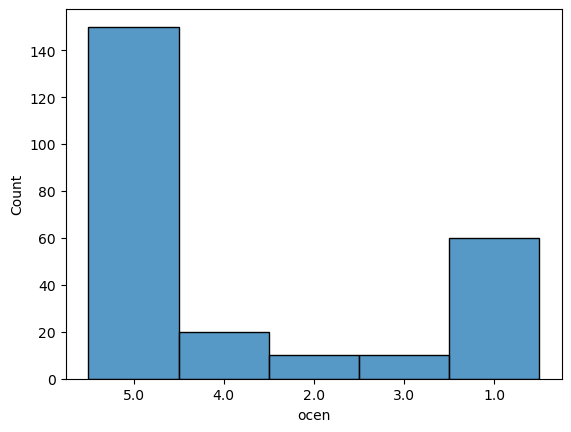

In [92]:
sns.histplot(data = df, x = 'ocen')

In [95]:
df[df['ocen'] == '1.0']

,url,text,ocen
14,https://yandex.lv/maps/org/jinju_bubble_tea/13...,"Из плюсов, это общий антураж кафе. На этом всё...",1.0
19,https://yandex.lv/maps/org/jinju_bubble_tea/13...,Соглашусь с некоторыми отзывами: \n1. Вывеска ...,1.0
27,https://yandex.lv/maps/org/jinju_bubble_tea/13...,"Брала не раз там кофе, стали явно обманывать. ...",1.0
28,https://yandex.lv/maps/org/jinju_bubble_tea/13...,"Были в этом кафе, заказывали два чая. Сначала ...",1.0
29,https://yandex.lv/maps/org/jinju_bubble_tea/13...,Ужасное место! (Раньше норм было) Оплата перев...,1.0
37,https://yandex.lv/maps/org/jinju_bubble_tea/13...,Персонал отвратительный. Оплатила заказ на 760...,1.0
38,https://yandex.lv/maps/org/jinju_bubble_tea/13...,Вчера вечером оплатила напиток 3 раза. Первые ...,1.0
40,https://yandex.lv/maps/org/jinju_bubble_tea/13...,Заезжала почти каждую неделю за латте с тапиок...,1.0
41,https://yandex.lv/maps/org/jinju_bubble_tea/13...,Я очень недовольна. Забежала взять кофе с собо...,1.0
44,https://yandex.lv/maps/org/jinju_bubble_tea/13...,"Очень сильный неприятный запах внутри, непонят...",1.0
